In [1]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report


In [2]:
!pip install kaggle


In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [4]:
!kaggle datasets download -d "hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images"

Dataset URL: https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
License(s): CC0-1.0


In [5]:
import zipfile
import os

# Define paths
zip_path = "/content/melanoma-skin-cancer-dataset-of-10000-images.zip"  # Adjust if filename is different
extract_path = "/content/skin_cancer_dataset"

# Create directory if not exists
os.makedirs(extract_path, exist_ok=True)

# Extract with progress bar
print("Extracting dataset...")
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted successfully to:", extract_path)


Extracting dataset...
Dataset extracted successfully to: /content/skin_cancer_dataset


In [6]:
import os

dataset_path = "/content/skin_cancer_dataset"  # Update if needed

# Walk through and display only directories
print("📁 All Folders in Dataset:\n")
for root, dirs, files in os.walk(dataset_path):
    for dir_name in dirs:
        print(os.path.join(root, dir_name))


📁 All Folders in Dataset:

/content/skin_cancer_dataset/melanoma_cancer_dataset
/content/skin_cancer_dataset/melanoma_cancer_dataset/test
/content/skin_cancer_dataset/melanoma_cancer_dataset/train
/content/skin_cancer_dataset/melanoma_cancer_dataset/test/malignant
/content/skin_cancer_dataset/melanoma_cancer_dataset/test/benign
/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant
/content/skin_cancer_dataset/melanoma_cancer_dataset/train/benign


In [7]:
file_path="/content/skin_cancer_dataset/melanoma_cancer_dataset/train"

In [8]:
name_class=os.listdir(file_path)
name_class

['malignant', 'benign']

In [9]:
filepaths = list(glob.glob(file_path+'/**/*.*'))
filepaths

['/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_5884.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_6747.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_9392.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_7791.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_8910.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_8980.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_6079.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_9026.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_6183.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_8958.jpg',
 '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_8540.jpg',

In [10]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'malignant',
 'mali

In [11]:

filepath = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')
data = pd.concat([filepath, labels], axis=1)
data = data.sample(frac=1).reset_index(drop=True)
data.head(5)


,Filepath,Label
0,/content/skin_cancer_dataset/melanoma_cancer_d...,malignant
1,/content/skin_cancer_dataset/melanoma_cancer_d...,malignant
2,/content/skin_cancer_dataset/melanoma_cancer_d...,benign
3,/content/skin_cancer_dataset/melanoma_cancer_d...,malignant
4,/content/skin_cancer_dataset/melanoma_cancer_d...,malignant


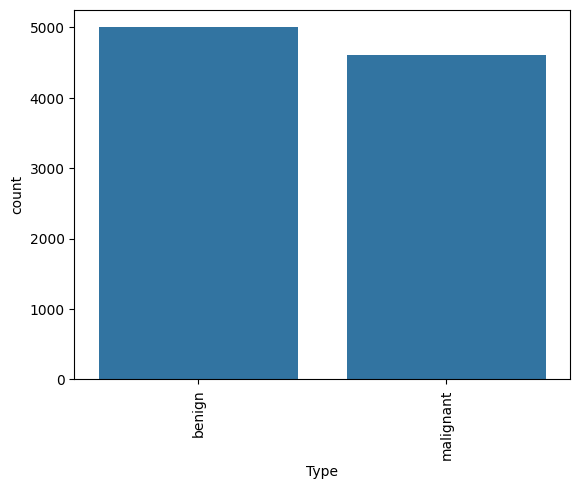

In [12]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90);

In [13]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

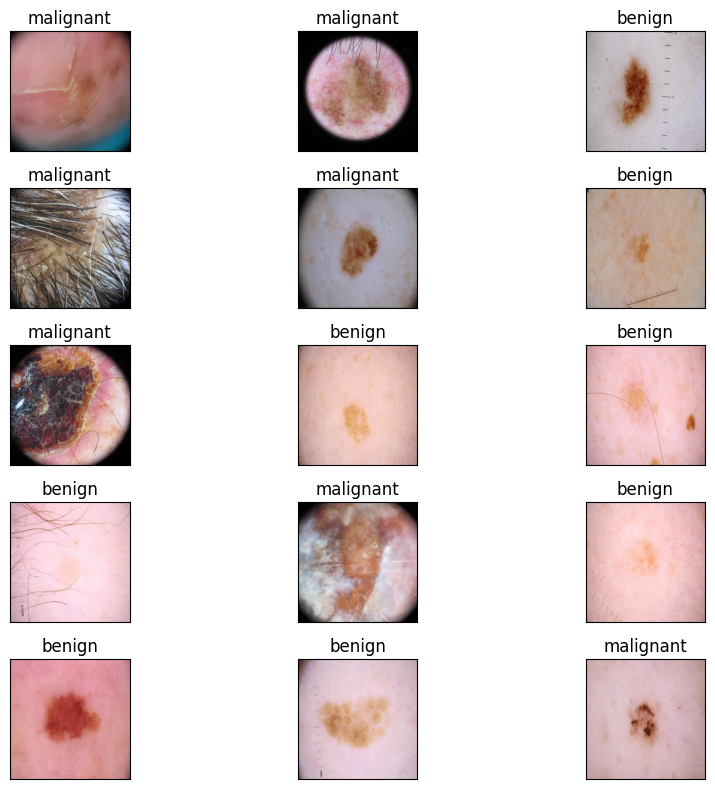

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks':[],'yticks':[]})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [15]:
# Step 17: Loading a Pretrained EfficientNetB0 Model
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

pretrained_model = EfficientNetB0(
    input_shape=(224,224, 3),  # Keeping the same input size
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

# Step 18: Adding Custom Layers on Top of EfficientNetB0
inputs = pretrained_model.input

x = Dense(128, activation='relu')(pretrained_model.output)
x = Dense(128, activation='relu')(x)

outputs = Dense(2, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

# Step 19: Compiling the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 20: Updating Preprocessing for EfficientNetB0
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [16]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False
)

Found 7203 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.
Found 2402 validated image filenames belonging to 2 classes.


In [17]:
my_callbacks  = [EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              mode='auto')]

In [18]:
history = model.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=50
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 62s 164ms/step - accuracy: 0.8692 - loss: 0.3055 - val_accuracy: 0.9276 - val_loss: 0.1811
Epoch 2/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 18s 81ms/step - accuracy: 0.9230 - loss: 0.1932 - val_accuracy: 0.9234 - val_loss: 0.1840
Epoch 3/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9267 - loss: 0.1781 - val_accuracy: 0.9338 - val_loss: 0.1681
Epoch 4/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9367 - loss: 0.1587 - val_accuracy: 0.9255 - val_loss: 0.1733
Epoch 5/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 19s 83ms/step - accuracy: 0.9419 - loss: 0.1533 - val_accuracy: 0.9338 - val_loss: 0.1623
Epoch 6/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 73ms/step - accuracy: 0.9469 - loss: 0.1365 - val_accuracy: 0.9230 - val_loss: 0.1883
Epoch 7/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 17s 74ms/step - accuracy: 0.9488 - loss: 0.1302 - val_accuracy: 0.9338 - val_loss: 0.1583
Epoch 8/50
226/226 ━━━━━━━━━━━━━━━━━━━━ 18s 79ms/step - accuracy: 0.9524 - loss: 0.1231 -

In [19]:
model.save("model_skin_cancer.h5")

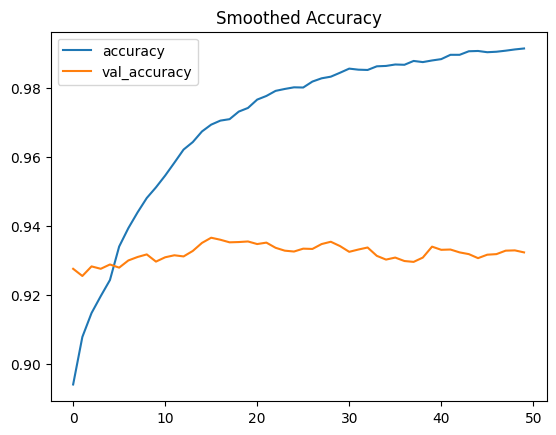

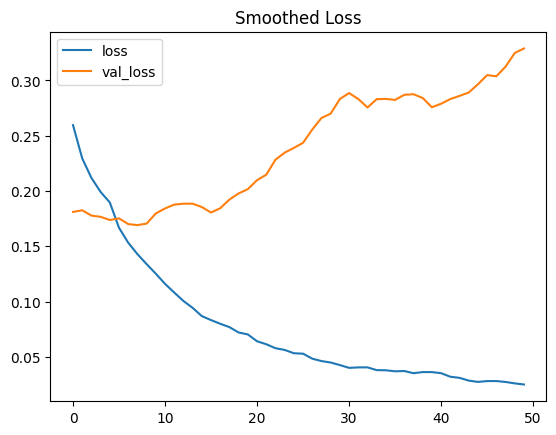

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert history to DataFrame
history_df = pd.DataFrame(history.history)

# Apply a rolling average with a window size of 5 (adjust as needed)
smooth_window = 5
history_df_smooth = history_df.rolling(window=smooth_window, min_periods=1).mean()

# Plot smoothed accuracy
history_df_smooth[['accuracy', 'val_accuracy']].plot()
plt.title("Smoothed Accuracy")
plt.show()

# Plot smoothed loss
history_df_smooth[['loss', 'val_loss']].plot()
plt.title("Smoothed Loss")
plt.show()


In [21]:
results = model.evaluate(test_gen, verbose=0)

print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


    Test Loss: 0.31698
Test Accuracy: 93.01%


In [22]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

# Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

76/76 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step


In [23]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      benign       0.92      0.94      0.93      1201
   malignant       0.94      0.92      0.93      1201

    accuracy                           0.93      2402
   macro avg       0.93      0.93      0.93      2402
weighted avg       0.93      0.93      0.93      2402



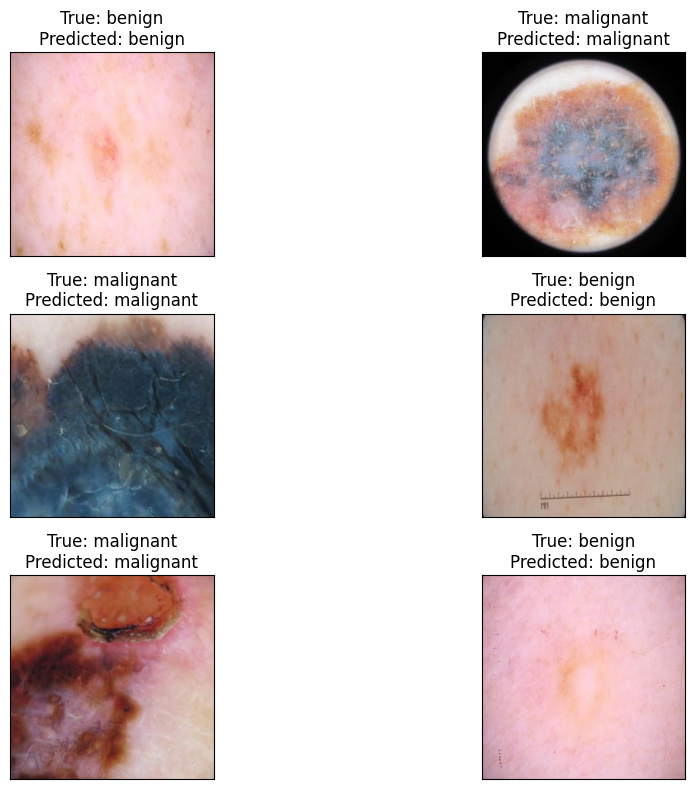

In [24]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 63ms/step


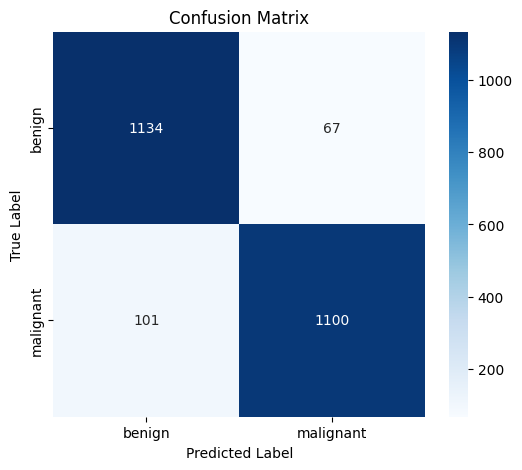

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get true labels from test_gen
y_true = test_gen.classes  # Assuming test_gen is an ImageDataGenerator

# Get predicted labels
y_pred = model.predict(test_gen)
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=test_gen.class_indices.keys(), yticklabels=test_gen.class_indices.keys())
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [26]:
from tensorflow.keras.models import load_model
loaded_model_skin_cancer = load_model("/content/model_skin_cancer.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step
[[ 0 99]]


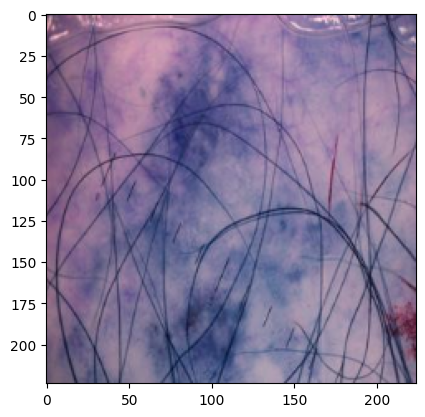

In [27]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = '/content/skin_cancer_dataset/melanoma_cancer_dataset/train/malignant/melanoma_5023.jpg'
#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = loaded_model_skin_cancer.predict(x)
print((result*100).astype('int'))

#print('Input image shape:', x.shape)

#my_image = imread(img_path)
#imshow(my_image)
plt.imshow(img)

In [28]:
p=list((result*100).astype('int'))
pp=list(p[0])
print(pp)

[np.int64(0), np.int64(99)]


In [29]:
print("Largest element is:", max(pp))

Largest element is: 99


In [30]:
index = pp.index(max(pp))

In [31]:
name_class=['benign', 'Malignant']

In [32]:
name_class[index]

'Malignant'

    Test Loss: 0.31698
Test Accuracy: 93.01%
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step


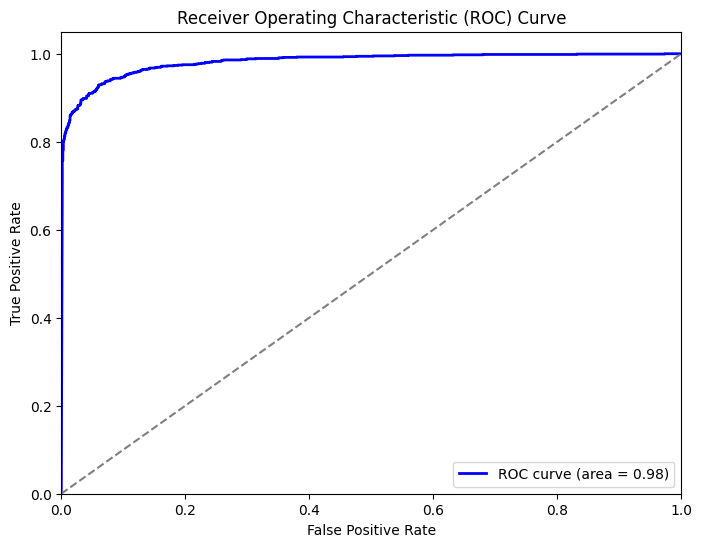

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1201
           1       0.94      0.92      0.93      1201

    accuracy                           0.93      2402
   macro avg       0.93      0.93      0.93      2402
weighted avg       0.93      0.93      0.93      2402



In [33]:
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report, roc_curve, auc

# Model evaluation
results = model.evaluate(test_gen, verbose=0)
print("    Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

# Compute predictions and probabilities
y_test = list(test.Label)
y_prob = model.predict(test_gen)

# Convert labels to binary (0 and 1)
label_mapping = {'benign': 0, 'malignant': 1}
y_test_binary = np.array([label_mapping[label] for label in y_test])

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test_binary, y_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Classification report
print(classification_report(y_test_binary, np.argmax(y_prob, axis=1)))